# Dataset Exploration & Distribution Analysis

Ce notebook permet d'explorer et visualiser la distribution des images dans le dataset de maladies des feuilles.

## 1. Imports

In [3]:
import os
import matplotlib.pyplot as plt
import numpy as np
import cv2
import random

## 2. Formatage du Dataset

Extraction et organisation du dataset depuis `leaves.zip` en structure Apple/Grape.

In [2]:
import zipfile
import shutil

def format_dataset():
    """
    Extrait leaves.zip et organise les sous-dossiers par classe (Apple/Grape).

    Structure initiale attendue dans leaves.zip:
    - images/
        - Apple_Black_rot/
        - Apple_Cedar_apple_rust/
        - Apple_healthy/
        - Apple_scab/
        - Grape_Black_rot/
        - Grape_Esca/
        - Grape_healthy/
        - Grape_spot/

    Structure finale:
    - Apple/
        - Apple_Black_rot/
        - Apple_Cedar_apple_rust/
        - Apple_healthy/
        - Apple_scab/
    - Grape/
        - Grape_Black_rot/
        - Grape_Esca/
        - Grape_healthy/
        - Grape_spot/
    """

    # 1. Extraire le fichier zip
    # Définir le chemin vers le fichier zip source
    zip_path = "../leaves.zip"
    # Définir le répertoire de destination pour l'extraction
    extract_to = "../"

    # Vérifier si le fichier zip existe
    if not os.path.exists(zip_path):
        # Afficher un message d'erreur si le fichier n'existe pas
        print(f"Le fichier {zip_path} n'existe pas")
        # Arrêter l'exécution de la fonction
        return

    # Afficher un message de début d'extraction
    print(f"Extraction de {zip_path}...")
    # Ouvrir le fichier zip en mode lecture
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        # Extraire tout le contenu dans le répertoire de destination
        zip_ref.extractall(extract_to)
    # Afficher un message de confirmation
    print(" Extraction terminée")

    # 2. Vérifier que le dossier images existe
    # Définir le chemin vers le dossier images extrait
    images_dir = "../images"
    # Vérifier si le dossier images existe après extraction
    if not os.path.exists(images_dir):
        # Afficher un message d'erreur si le dossier n'existe pas
        print(f"Le dossier {images_dir} n'existe pas après extraction")
        # Arrêter l'exécution de la fonction
        return

    # 3. Créer les dossiers Apple et Grape
    # Définir le chemin pour le dossier Apple
    apple_dir = "../Apple"
    # Définir le chemin pour le dossier Grape
    grape_dir = "../Grape"

    # Créer le dossier Apple s'il n'existe pas déjà
    os.makedirs(apple_dir, exist_ok=True)
    # Créer le dossier Grape s'il n'existe pas déjà
    os.makedirs(grape_dir, exist_ok=True)
    # Afficher un message de confirmation de création
    print(f"Dossiers {apple_dir} et {grape_dir} créés")

    # 4. Déplacer les sous-dossiers dans leur classe correspondante
    # Initialiser un compteur pour les dossiers déplacés
    moved_count = 0
    # Parcourir tous les éléments dans le dossier images
    for subdir in os.listdir(images_dir):
        # Construire le chemin complet du sous-dossier
        subdir_path = os.path.join(images_dir, subdir)

        # Vérifier si l'élément est bien un dossier
        if not os.path.isdir(subdir_path):
            # Passer à l'élément suivant si ce n'est pas un dossier
            continue

        # Déterminer la classe (Apple ou Grape)
        # Vérifier si le nom du dossier commence par "Apple_"
        if subdir.startswith("Apple_"):
            # Construire le chemin de destination dans le dossier Apple
            destination = os.path.join(apple_dir, subdir)
            # Déplacer le dossier vers le répertoire Apple
            shutil.move(subdir_path, destination)
            # Afficher un message indiquant le déplacement
            print(f"  ➜ {subdir} → {apple_dir}/")
            # Incrémenter le compteur de dossiers déplacés
            moved_count += 1
        # Vérifier si le nom du dossier commence par "Grape_"
        elif subdir.startswith("Grape_"):
            # Construire le chemin de destination dans le dossier Grape
            destination = os.path.join(grape_dir, subdir)
            # Déplacer le dossier vers le répertoire Grape
            shutil.move(subdir_path, destination)
            # Afficher un message indiquant le déplacement
            print(f"  ➜ {subdir} → {grape_dir}/")
            # Incrémenter le compteur de dossiers déplacés
            moved_count += 1
        # Si le dossier ne correspond à aucune classe
        else:
            # Afficher un message d'avertissement
            print(f"Dossier ignoré: {subdir} (pas de classe reconnue)")

    # 5. Supprimer le dossier images vide
    # Vérifier si le dossier images existe et s'il est vide
    if os.path.exists(images_dir) and not os.listdir(images_dir):
        # Supprimer le dossier vide
        os.rmdir(images_dir)
        # Afficher un message de confirmation
        print(f"Dossier {images_dir} supprimé (vide)")

    # Afficher un résumé du formatage
    print(f"\n Formatage terminé! {moved_count} dossiers déplacés")
    # Afficher le nombre de catégories dans le dossier Apple
    print(f"  - Apple: {len(os.listdir(apple_dir))} catégories")
    # Afficher le nombre de catégories dans le dossier Grape
    print(f"  - Grape: {len(os.listdir(grape_dir))} catégories")

# Exécuter le formatage
format_dataset()

Extraction de ../leaves.zip...
 Extraction terminée
Dossiers ../Apple et ../Grape créés
  ➜ Grape_Esca → ../Grape/
  ➜ Grape_healthy → ../Grape/
  ➜ Apple_scab → ../Apple/
  ➜ Grape_Black_rot → ../Grape/
  ➜ Apple_healthy → ../Apple/
  ➜ Grape_spot → ../Grape/
  ➜ Apple_rust → ../Apple/
  ➜ Apple_Black_rot → ../Apple/
Dossier ../images supprimé (vide)

 Formatage terminé! 8 dossiers déplacés
  - Apple: 4 catégories
  - Grape: 4 catégories


## 2.1. Configuration

In [3]:
# Chemin vers le dataset
DATA_DIR = "../Apple"

# Vérifier que le dossier existe
if not os.path.exists(DATA_DIR):
    print(f"Le dossier {DATA_DIR} n'existe pas!")
else:
    print(f"Dossier trouvé: {DATA_DIR}")

Dossier trouvé: ../Apple


## 3. Analyse du Dataset

In [4]:
def analyze_dataset(directory):
    """
    Analyse le dataset et retourne les statistiques par plante et maladie.
    """
    # Initialiser un dictionnaire vide pour stocker les types de plantes et leurs maladies
    plant_types = {}
    # Parcourir tous les sous-dossiers dans le répertoire spécifié
    for subdir in os.listdir(directory):
        # Construire le chemin complet vers le sous-dossier
        path = os.path.join(directory, subdir)
        # Vérifier si le chemin correspond à un dossier
        if os.path.isdir(path):
            # Tenter de séparer le nom du dossier en type de plante et maladie
            try:
                # Diviser le nom du dossier au premier underscore (ex: "Grape_Black_rot" → "Grape", "Black_rot")
                plant_type, disease = subdir.split('_', 1)
                # Vérifier si ce type de plante n'est pas encore dans le dictionnaire
                if plant_type not in plant_types:
                    # Créer une nouvelle entrée avec un dictionnaire vide pour ce type de plante
                    plant_types[plant_type] = {}
                # Compter le nombre d'images dans ce dossier en listant tous les fichiers
                num_images = len([
                    # Pour chaque fichier f dans le dossier
                    f for f in os.listdir(path)
                    # Ne garder que les fichiers avec extension .jpg (en minuscule)
                    if f.lower().endswith(('.jpg'))
                ])
                # Stocker le nombre d'images pour cette combinaison plante/maladie
                plant_types[plant_type][disease] = num_images
            # Gérer le cas où le nom du dossier ne contient pas d'underscore
            except ValueError:
                # Afficher un message d'avertissement pour les dossiers au format incorrect
                print(f"Attention: Dossier ignoré '{subdir}'"
                      f"(format incorrect)")
    # Retourner le dictionnaire contenant toutes les statistiques
    return plant_types

# Exécuter la fonction d'analyse sur le répertoire défini dans DATA_DIR
plant_types = analyze_dataset(DATA_DIR)

# Afficher un titre pour la section des résultats
print("\n=== STATISTIQUES DU DATASET ===")
# Initialiser un compteur pour le nombre total d'images
total_images = 0
# Parcourir chaque type de plante et ses maladies associées
for plant_type, diseases in plant_types.items():
    # Afficher le nom du type de plante
    print(f"\n{plant_type}:")
    # Parcourir chaque maladie et son nombre d'images
    for disease, count in diseases.items():
        # Afficher le nom de la maladie et son nombre d'images
        print(f"  - {disease}: {count} images")
        # Ajouter le nombre d'images au total général
        total_images += count
    # Afficher le total d'images pour ce type de plante
    print(f"  Total {plant_type}: {sum(diseases.values())} images")

# Afficher le nombre total d'images dans tout le dataset
print(f"\nTOTAL GÉNÉRAL: {total_images} images")


=== STATISTIQUES DU DATASET ===

Apple:
  - Black_rot: 620 images
  - rust: 275 images
  - scab: 629 images
  - healthy: 1640 images
  Total Apple: 3164 images

TOTAL GÉNÉRAL: 3164 images


## 4. Visualisation de la Distribution

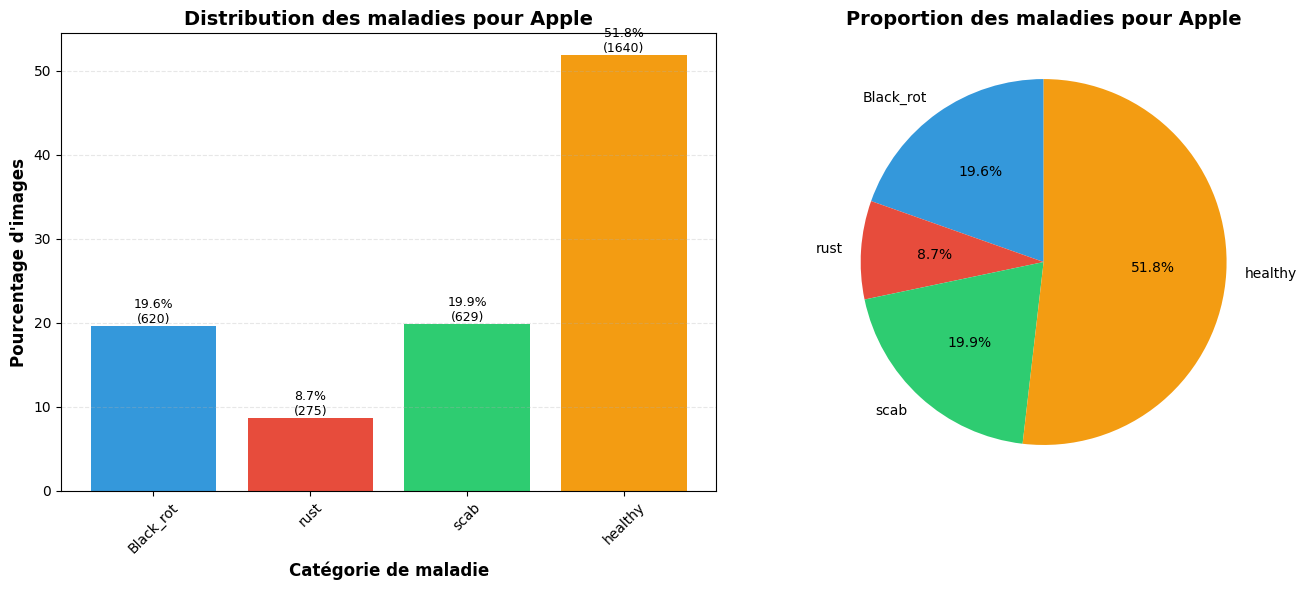

In [5]:
def plot_distribution(plant_type, disease_counts):
    """
    Affiche un bar chart et un pie chart pour la distribution des maladies.
    """
    # Séparer les clés (noms des maladies) et les valeurs (nombres d'images) du dictionnaire
    labels, values = zip(*disease_counts.items())
    # Calculer le nombre total d'images pour ce type de plante
    total_images = sum(values)
    # Convertir les nombres d'images en pourcentages par rapport au total
    proportions = [value / total_images * 100 for value in values]

    # Créer une figure avec deux sous-graphiques côte à côte (1 ligne, 2 colonnes)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

    # Bar chart
    # Définir une liste de couleurs pour les barres
    colors = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12', '#9b59b6', '#1abc9c']
    # Créer un diagramme en barres avec les proportions et les couleurs
    bars = ax1.bar(labels, proportions, color=colors[:len(labels)])
    # Étiqueter l'axe X avec "Catégorie de maladie"
    ax1.set_xlabel('Catégorie de maladie', fontsize=12, fontweight='bold')
    # Étiqueter l'axe Y avec "Pourcentage d'images"
    ax1.set_ylabel('Pourcentage d\'images', fontsize=12, fontweight='bold')
    # Ajouter un titre au graphique en barres avec le nom du type de plante
    ax1.set_title(f'Distribution des maladies pour {plant_type}',
                  fontsize=14, fontweight='bold')
    # Faire pivoter les étiquettes de l'axe X de 45 degrés pour une meilleure lisibilité
    ax1.tick_params(axis='x', rotation=45)
    # Ajouter une grille horizontale avec un style pointillé et une transparence
    ax1.grid(axis='y', alpha=0.3, linestyle='--')

    # Ajouter les valeurs sur les barres
    # Parcourir chaque barre, son pourcentage et sa valeur correspondante
    for bar, prop, val in zip(bars, proportions, values):
        # Récupérer la hauteur de la barre (la valeur du pourcentage)
        height = bar.get_height()
        # Ajouter du texte au-dessus de la barre avec le pourcentage et le nombre d'images
        ax1.text(bar.get_x() + bar.get_width() / 2., height,
                 f'{prop:.1f}%\n({val})',
                 ha='center', va='bottom', fontsize=9)

    # Pie chart
    # Créer un diagramme circulaire avec les proportions, étiquettes, et pourcentages
    ax2.pie(proportions, labels=labels, autopct='%1.1f%%',
            colors=colors[:len(labels)], startangle=90)
    # Ajouter un titre au diagramme circulaire avec le nom du type de plante
    ax2.set_title(f'Proportion des maladies pour {plant_type}',
                  fontsize=14, fontweight='bold')

    # Ajuster automatiquement les espacements entre les sous-graphiques
    plt.tight_layout()
    # Afficher le graphique
    plt.show()

# Visualiser pour chaque type de plante
# Parcourir chaque type de plante et ses maladies associées
for plant_type, disease_counts in plant_types.items():
    # Appeler la fonction pour afficher les graphiques de distribution pour ce type de plante
    plot_distribution(plant_type, disease_counts)

## 5. Analyse de l'Équilibrage

Vérifions si les classes sont équilibrées ou s'il faut appliquer une augmentation.

In [6]:
# Affiche le titre de la section d'analyse de l'équilibrage
print("=== ANALYSE DE L'ÉQUILIBRAGE ===")

# Parcourt chaque type de plante et son dictionnaire de maladies
for plant_type, diseases in plant_types.items():
    # Récupère la liste des nombres d'images pour chaque maladie
    counts = list(diseases.values())
    # Calcule le nombre maximum d'images parmi les maladies
    max_count = max(counts)
    # Calcule le nombre minimum d'images parmi les maladies
    min_count = min(counts)
    # Calcule la moyenne des nombres d'images
    mean_count = np.mean(counts)
    # Calcule l'écart-type des nombres d'images
    std_count = np.std(counts)

    # Affiche le nom du type de plante (séparé par une ligne vide)
    print(f"\n{plant_type}:")
    # Affiche le nombre maximum d'images
    print(f"  Max: {max_count} images")
    # Affiche le nombre minimum d'images
    print(f"  Min: {min_count} images")
    # Affiche la moyenne formatée avec une décimale
    print(f"  Moyenne: {mean_count:.1f} images")
    # Affiche l'écart-type formaté avec une décimale
    print(f"  Écart-type: {std_count:.1f}")
    # Affiche le ratio entre max et min (attention: division par zéro possible si min_count == 0)
    print(f"  Ratio max/min: {max_count/min_count:.2f}")

=== ANALYSE DE L'ÉQUILIBRAGE ===

Apple:
  Max: 1640 images
  Min: 275 images
  Moyenne: 791.0 images
  Écart-type: 510.5
  Ratio max/min: 5.96


## 6. Visualisation d'Exemples d'Images

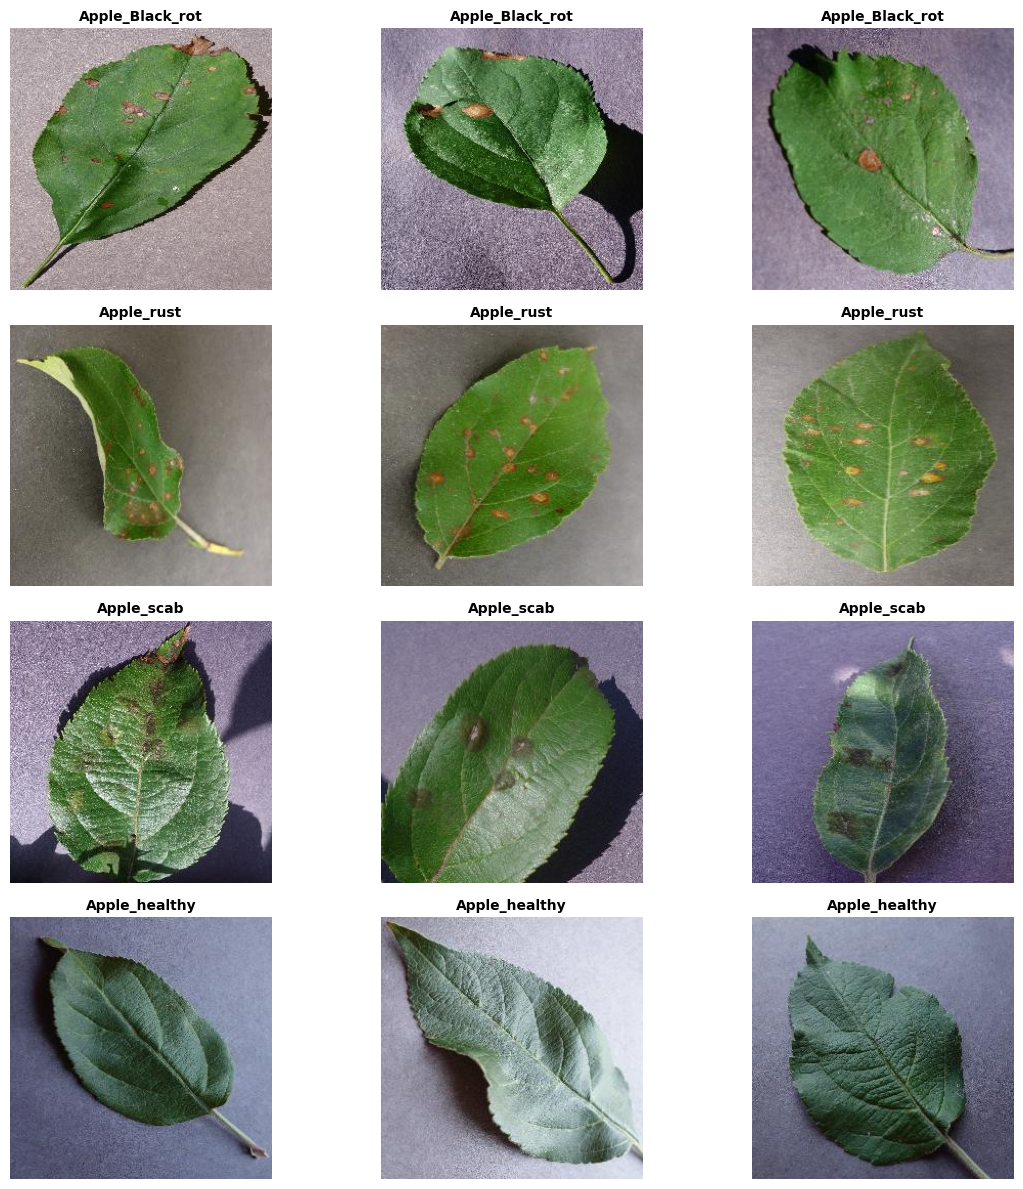

In [7]:
# Définition de la fonction qui affiche des images échantillons pour chaque catégorie
def display_sample_images(data_dir, num_samples=3):
    # Docstring décrivant brièvement la fonction
    """
    Affiche des exemples d'images pour chaque catégorie.
    """
    # Lister les sous-dossiers du répertoire de données et garder uniquement les dossiers (catégories)
    categories = [d for d in os.listdir(data_dir)
                  if os.path.isdir(os.path.join(data_dir, d))]

    # Calculer le nombre de catégories trouvées
    num_categories = len(categories)
    # Créer une figure matplotlib avec une grille num_categories x num_samples et taille adaptée
    fig, axes = plt.subplots(num_categories, num_samples,
                             figsize=(num_samples*4, num_categories*3))

    # Si il n'y a qu'une seule catégorie, normaliser la structure de 'axes' pour itération
    if num_categories == 1:
        axes = [axes]

    # Parcourir les catégories avec leur index
    for i, category in enumerate(categories):
        # Construire le chemin complet vers le dossier de la catégorie
        category_path = os.path.join(data_dir, category)
        # Lister les fichiers images valides dans le dossier de la catégorie
        images = [f for f in os.listdir(category_path)
                  if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

        # Sélectionner aléatoirement jusqu'à num_samples images (ou moins si pas assez)
        selected_images = random.sample(images, min(num_samples, len(images)))

        # Parcourir les images sélectionnées avec leur index
        for j, img_name in enumerate(selected_images):
            # Construire le chemin complet de l'image
            img_path = os.path.join(category_path, img_name)
            # Lire l'image avec OpenCV (BGR)
            img = cv2.imread(img_path)
            # Convertir l'image de BGR vers RGB pour l'affichage correct avec matplotlib
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

            # Sélectionner l'axe correspondant dans la grille (gérer le cas 1 vs multiples catégories)
            ax = axes[i][j] if num_categories > 1 else axes[j]
            # Afficher l'image sur l'axe sélectionné
            ax.imshow(img)
            # Définir le titre de la sous-figure avec le nom de la catégorie
            ax.set_title(f"{category}", fontsize=10, fontweight='bold')
            # Masquer les axes pour une meilleure présentation
            ax.axis('off')

    # Ajuster automatiquement les espacements entre sous-figures
    plt.tight_layout()
    # Afficher la figure complète
    plt.show()

# Appel de la fonction pour afficher des exemples à partir du DATA_DIR défini précédemment
display_sample_images(DATA_DIR, num_samples=3)